In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hexsha_df = pd.read_csv('../../../../sample_data/data/camel_in_spiral/hexsha_filename_camel.txt',
                        header=None,
                        names=["id","commit_hash", "before_filename", "after_filename","change_type"]
                        )

In [3]:
def excute(i):
    dic = {}
    with open('../../../../sample_data/data/camel_in_spiral/snippet_camel_'+str(i)+'.txt') as f:
        while True:
            line = f.readline()
            if line == '':
                break
            tmp = line.split('\t')
            # if tmp[1].strip() != '':
            #     dic[tmp[0]] = len(tmp[1:])
            dic[tmp[0]] = len(tmp[1:])

    id_list = []
    id2_list = []
    for key in dic.keys():
        tmp = key.split('-')
        id_list.append(int(tmp[0]))
        id2_list.append(int(tmp[1]))
        
    length_df = pd.DataFrame(
        data= {'id':id_list,
            'id2':id2_list,
            'snippet_length':dic.values()
            }
    )

    df = pd.merge(length_df, hexsha_df, on='id', how='left')
    df.to_csv('../label/camel_'+str(i)+'.csv')

In [6]:
for i in range(0,71):
    excute(i)

In [7]:
df_list = []
for i in range(0, 71):
    df  = pd.read_csv('../label/camel_'+str(i)+'.csv')
    df_list.append(df)

In [8]:
df_list[0]

,Unnamed: 0,id,id2,snippet_length,commit_hash,before_filename,after_filename,change_type
0,0,1,1,37,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
1,1,2,1,28,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
2,2,3,1,88,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
3,3,4,1,31,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
4,4,5,1,114,77b260b65ba821b3443d922320cc3d9b708c8d83,camel/camel-core/src/main/java/org/apache/came...,camel/camel-core/src/main/java/org/apache/came...,A
...,...,...,...,...,...,...,...,...
723425,723425,215351,3,16,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
723426,723426,215352,1,3,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
723427,723427,215352,2,4,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M
723428,723428,215353,1,3,e2d6c518df53fa0d06a7d308acff377993e80278,components/camel-jsonpath/src/test/java/org/ap...,components/camel-jsonpath/src/test/java/org/ap...,M


In [9]:
df_list2 = []
for df in df_list:
    df_list2.append(df[['id', 'change_type', 'snippet_length']].groupby(['id','change_type'], as_index=False).sum())

In [10]:
df_list2[0]

,id,change_type,snippet_length
0,1,A,37
1,2,A,28
2,3,A,88
3,4,A,31
4,5,A,114
...,...,...,...
158835,215349,M,24
158836,215350,M,8
158837,215351,M,24
158838,215352,M,7


In [11]:
df_list3 = []
for i, df in enumerate(df_list2):
    df['snippet_id'] = i
    df_list3.append(df[['snippet_id','id','change_type','snippet_length']])

In [12]:
df_list3[0]

,snippet_id,id,change_type,snippet_length
0,0,1,A,37
1,0,2,A,28
2,0,3,A,88
3,0,4,A,31
4,0,5,A,114
...,...,...,...,...
158835,0,215349,M,24
158836,0,215350,M,8
158837,0,215351,M,24
158838,0,215352,M,7


In [13]:
con_df = pd.concat(df_list2, axis=0)
con_df

,id,change_type,snippet_length,snippet_id
0,1,A,37,0
1,2,A,28,0
2,3,A,88,0
3,4,A,31,0
4,5,A,114,0
...,...,...,...,...
158835,215349,M,202,70
158836,215350,M,151,70
158837,215351,M,198,70
158838,215352,M,144,70


In [14]:
con_df[['snippet_id','change_type', 'snippet_length']].groupby(['snippet_id','change_type'], as_index=False).agg(['count','mean','std','median','max','min'])

snippet_length                                        \
                                count        mean         std median    max   
snippet_id change_type                                                        
0          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183   46.926769  167.378018   11.0  33430   
           R                     4170   22.234053   61.522043    4.0   1453   
1          A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183   56.422279  179.110947   17.0  33443   
...                               ...         ...         ...    ...    ...   
69         M                   128183  333.334108  407.346977  210.0  33875   
           R                     4170  233.936691  347.156592  155.0  10046   
70         A                    26487  467.820667  791.192629  301.0  49908   
           M                   128183  335.840213  408.699494  212.0  33881   
           R                     4170  235.387530  348.378685  157.0  10067   

                            
                       min  
snippet_id change_type      
0          A            12  
           M             1  
           R             1  
1          A            12  
           M             1  
...                     ..  
69         M             1  
           R            15  
70         A            12  
           M             1  
           R            15  

[213 rows x 6 columns]

In [15]:
# ソースコード片の単語数　90%ライン
target_ratio = 0.9
threshold_list = []
for i , df in enumerate(df_list2):
    sorted_df = df.sort_values('snippet_length')
    cumulative_sum = sorted_df['snippet_length'].cumsum()
    cumulative_ratio = cumulative_sum / cumulative_sum.max()

    threshold_value = sorted_df.loc[cumulative_ratio >= target_ratio, 'snippet_length'].iloc[0]
    threshold_list.append(threshold_value)
    print(str(i)+':'+str(threshold_value))

0:2726
1:2640
2:2551
3:2475
4:2455
5:2434
6:2450
7:2522
8:2504
9:2572
10:2551
11:2517
12:2467
13:2454
14:2435
15:2390
16:2358
17:2332
18:2311
19:2294
20:2283
21:2265
22:2242
23:2233
24:2220
25:2200
26:2185
27:2167
28:2155
29:2145
30:2126
31:2119
32:2114
33:2099
34:2099
35:2095
36:2088
37:2080
38:2080
39:2076
40:2068
41:2063
42:2059
43:2058
44:2059
45:2057
46:2050
47:2047
48:2042
49:2041
50:2035
51:2036
52:2032
53:2031
54:2031
55:2026
56:2026
57:2022
58:2014
59:2012
60:2013
61:2012
62:2011
63:2010
64:2012
65:2011
66:2012
67:2014
68:2014
69:2013
70:2012


In [16]:
avg = sum(threshold for threshold in threshold_list) / len(threshold_list)
avg 

2189.4647887323945

In [31]:
# bins = [0, 100, 1000, 10000, 50000]
# labels = ['0-100', '100-1000', '1000-10000', '10000-50000']  # 各範囲のラベル

# for i , df2 in enumerate(df_list2):
#     df2['snippet_length_range'] = pd.cut(df2['snippet_length'], bins=bins, labels=labels)

#     # 範囲ごとのchange_typeの数を計算
#     change_type_counts = df2.groupby(['snippet_length_range', 'change_type']).size().unstack()

#     change_type_counts.plot(kind='bar', stacked=True)
#     plt.xlabel('Snippet Length Range : ' + str(i))


# plt.ylabel('Count')
# plt.title('Change Type Count by Snippet Length Range')
# plt.legend(title='Change Type')

# plt.show()

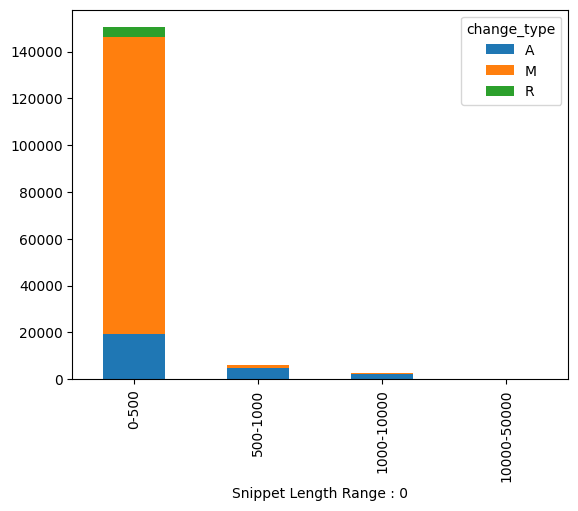

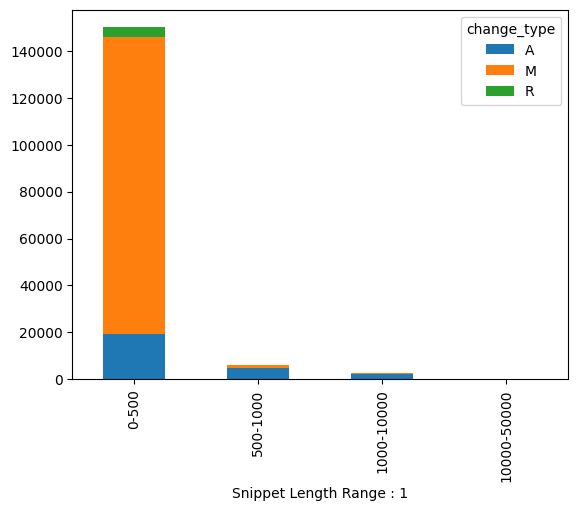

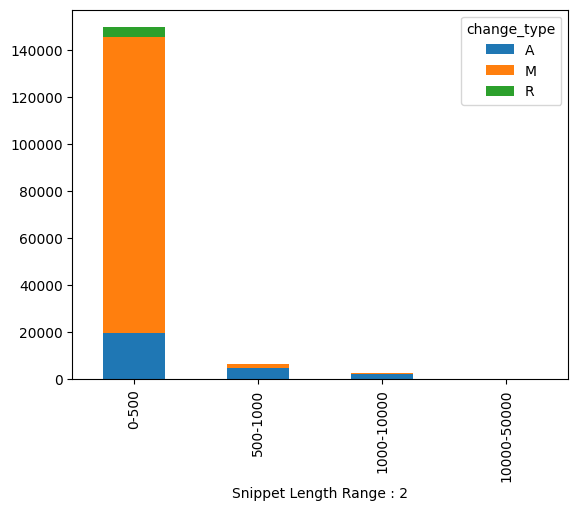

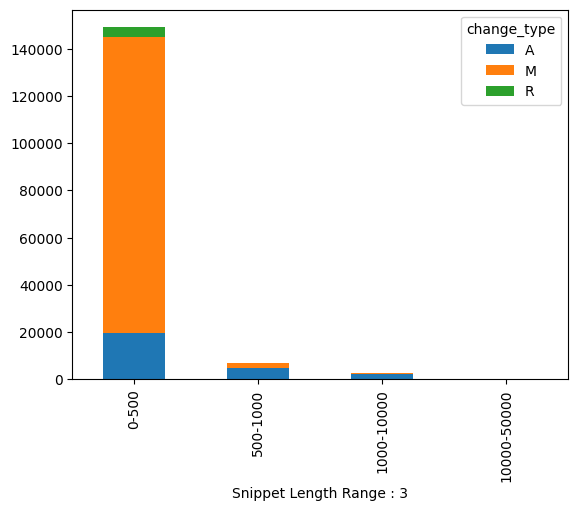

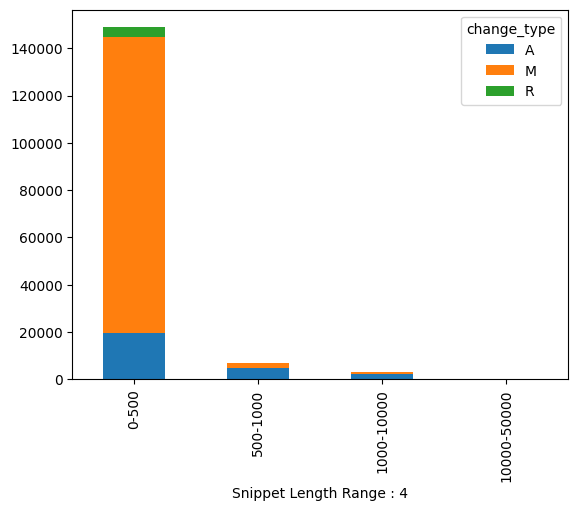

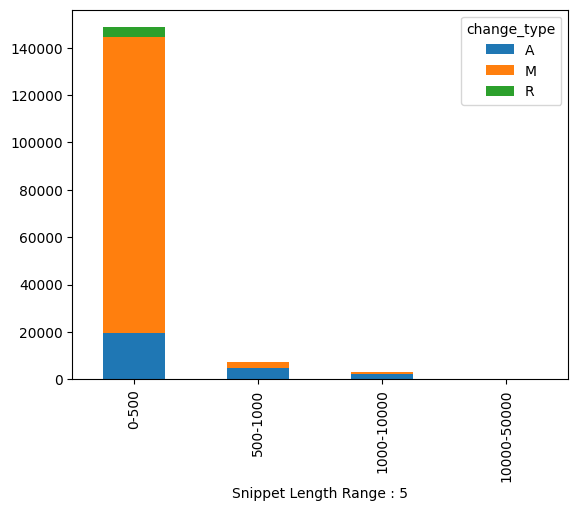

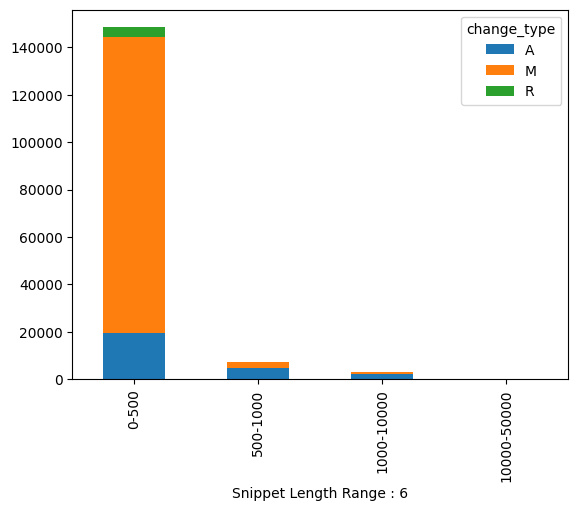

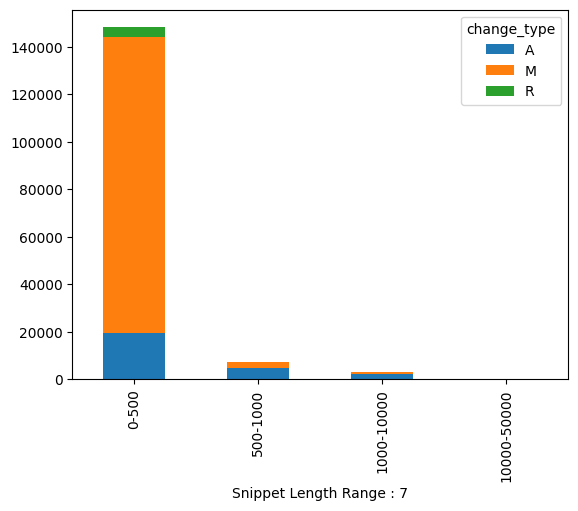

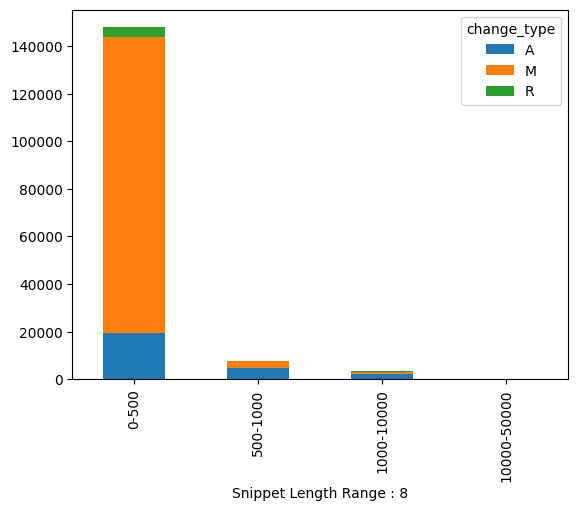

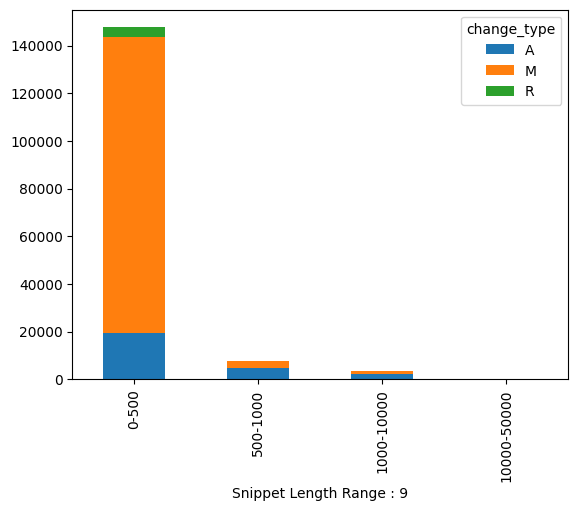

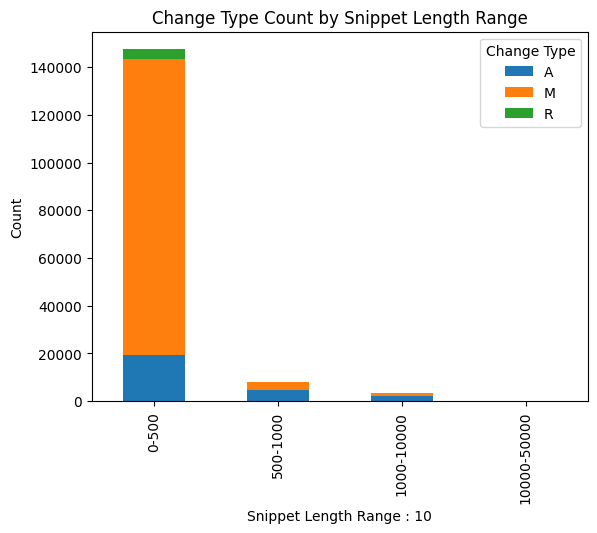

In [32]:
bins = [0, 500, 1000, 10000, 50000]
labels = ['0-500', '500-1000', '1000-10000', '10000-50000']  # 各範囲のラベル

for i , df2 in enumerate(df_list2):
    df2['snippet_length_range'] = pd.cut(df2['snippet_length'], bins=bins, labels=labels)

    # 範囲ごとのchange_typeの数を計算
    change_type_counts = df2.groupby(['snippet_length_range', 'change_type']).size().unstack()

    change_type_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Snippet Length Range : ' + str(i))


plt.ylabel('Count')
plt.title('Change Type Count by Snippet Length Range')
plt.legend(title='Change Type')

plt.show()

In [34]:
for df2 in df_list2:
    print(df2['snippet_length_range'].value_counts() / df2.shape[0])

snippet_length_range
0-500          0.946802
500-1000       0.036981
1000-10000     0.016092
10000-50000    0.000126
Name: count, dtype: float64
snippet_length_range
0-500          0.944963
500-1000       0.038359
1000-10000     0.016520
10000-50000    0.000157
Name: count, dtype: float64
snippet_length_range
0-500          0.942067
500-1000       0.040676
1000-10000     0.017099
10000-50000    0.000157
Name: count, dtype: float64
snippet_length_range
0-500          0.939316
500-1000       0.042640
1000-10000     0.017886
10000-50000    0.000157
Name: count, dtype: float64
snippet_length_range
0-500          0.937679
500-1000       0.043604
1000-10000     0.018560
10000-50000    0.000157
Name: count, dtype: float64
snippet_length_range
0-500          0.936124
500-1000       0.044661
1000-10000     0.019057
10000-50000    0.000157
Name: count, dtype: float64
snippet_length_range
0-500          0.934544
500-1000       0.045763
1000-10000     0.019535
10000-50000    0.000157
Name: count, 

In [35]:
df_list3 = []
for df2 in df_list2:
    df_list3.append(df2[df2['change_type'] != 'A'])

C:\Users\masak\AppData\Local\Temp\ipykernel_37368\609889279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['snippet_length_range'] = pd.cut(df3['snippet_length'], bins=bins, labels=labels)
C:\Users\masak\AppData\Local\Temp\ipykernel_37368\609889279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['snippet_length_range'] = pd.cut(df3['snippet_length'], bins=bins, labels=labels)
C:\Users\masak\AppData\Local\Temp\ipykernel_37368\609889279.py:5: SettingWithCopyWarning: 
A value is trying to be s

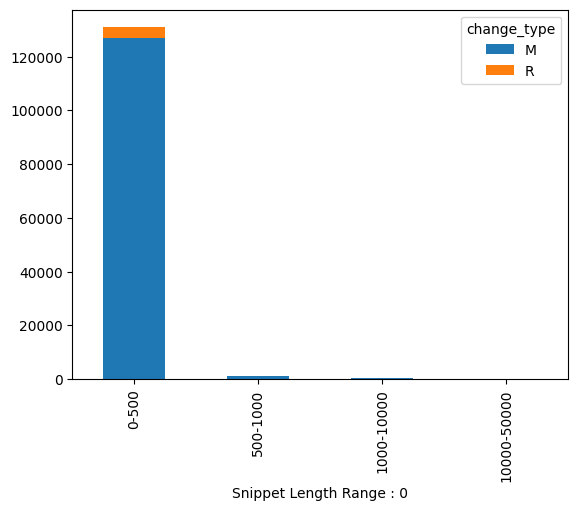

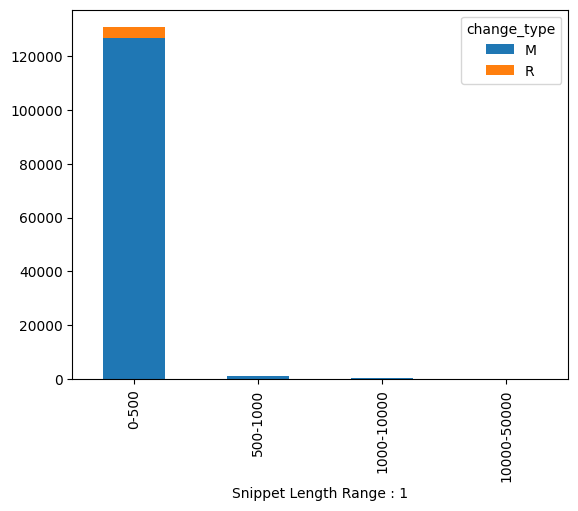

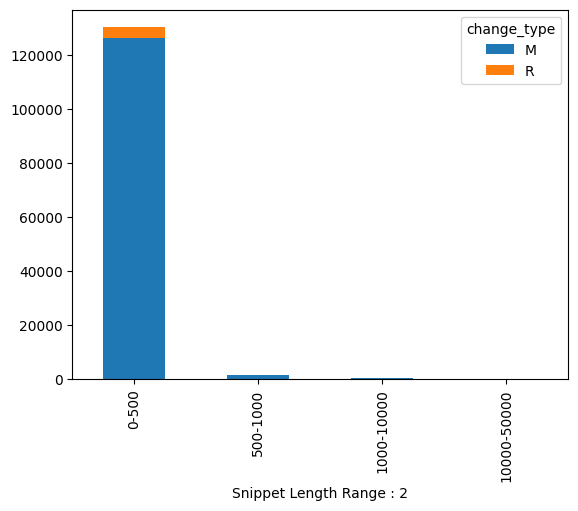

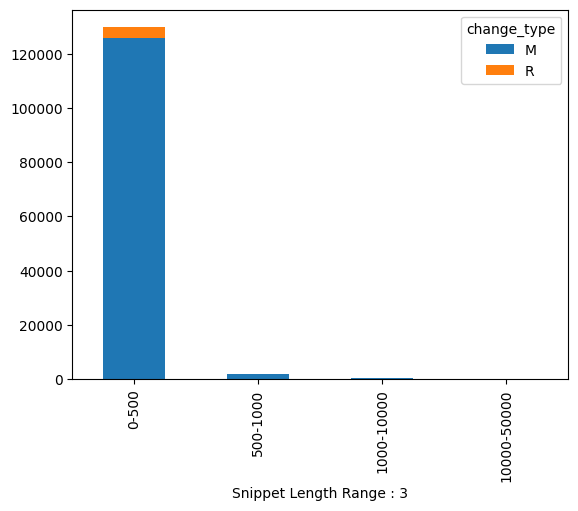

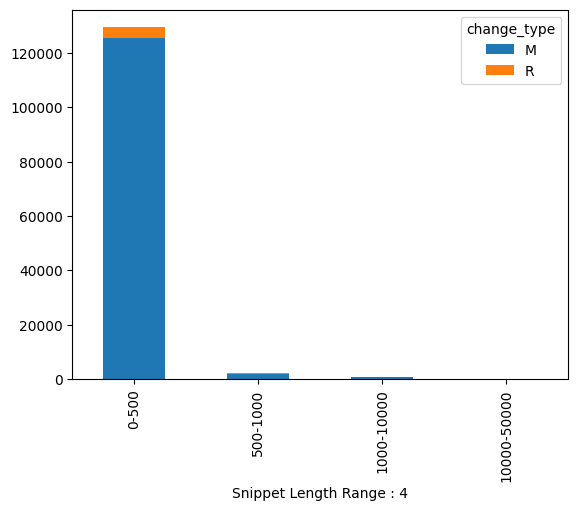

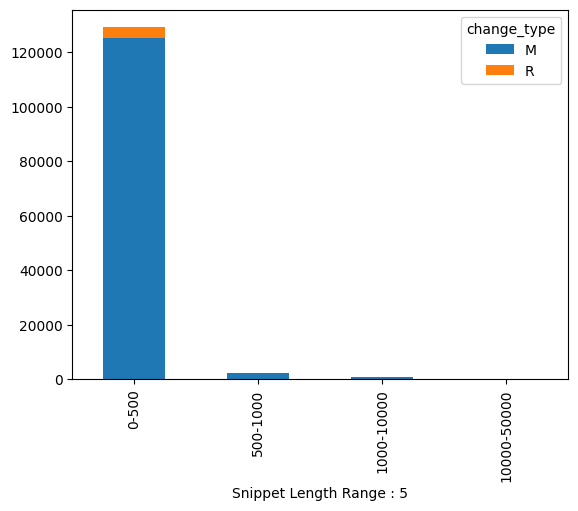

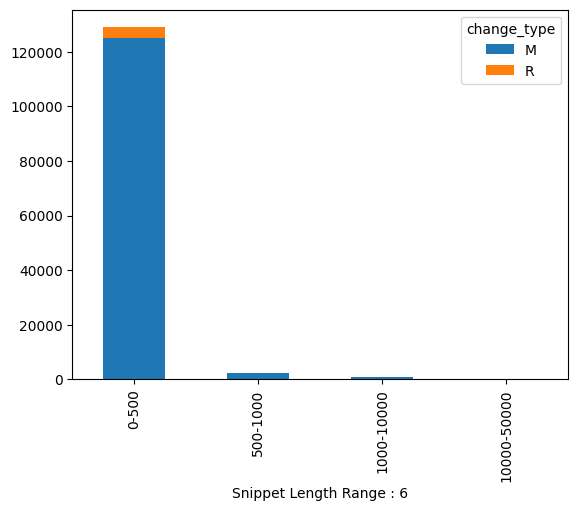

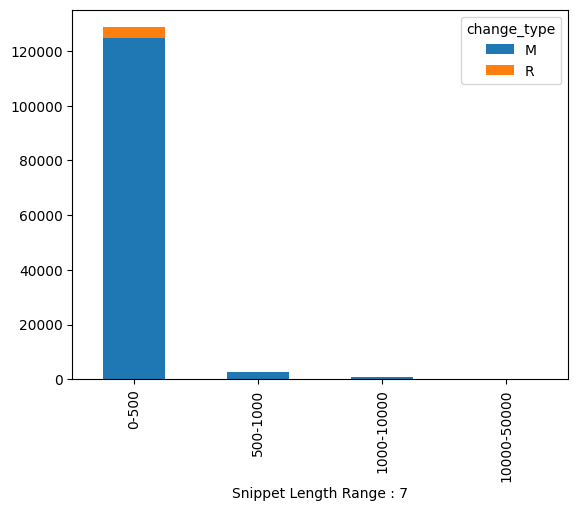

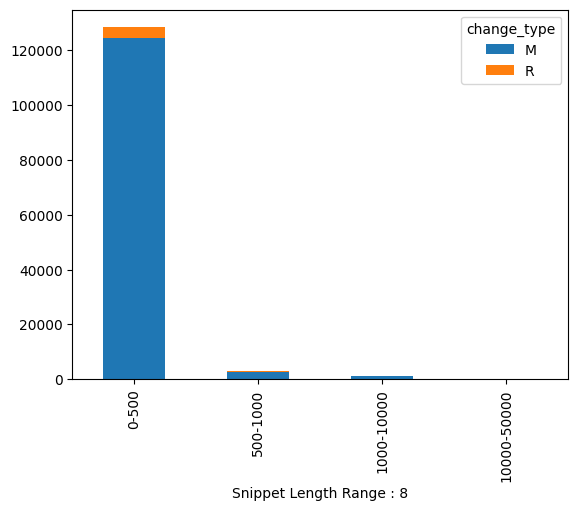

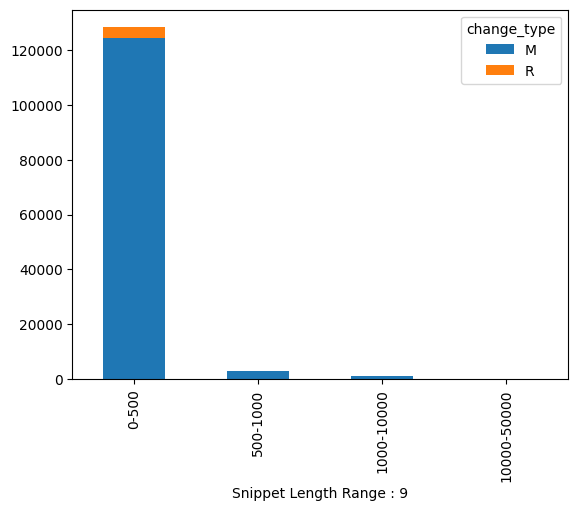

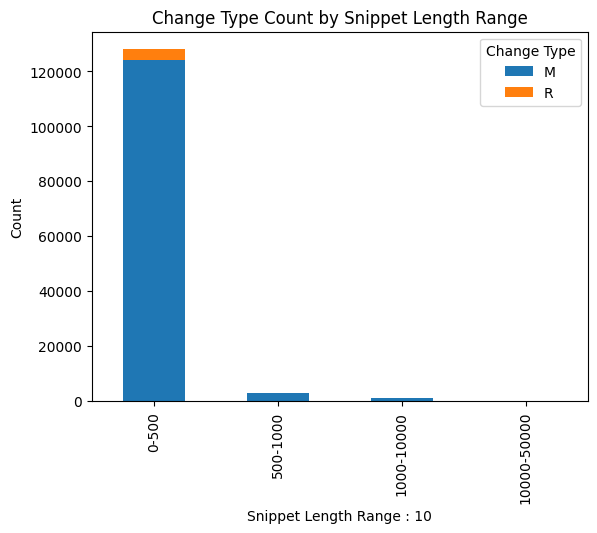

In [36]:
bins = [0, 500, 1000, 10000, 50000]
labels = ['0-500', '500-1000', '1000-10000', '10000-50000']  # 各範囲のラベル

for i , df3 in enumerate(df_list3):
    df3['snippet_length_range'] = pd.cut(df3['snippet_length'], bins=bins, labels=labels)

    # 範囲ごとのchange_typeの数を計算
    change_type_counts = df3.groupby(['snippet_length_range', 'change_type']).size().unstack()

    change_type_counts.plot(kind='bar', stacked=True)
    plt.xlabel('Snippet Length Range : ' + str(i))


plt.ylabel('Count')
plt.title('Change Type Count by Snippet Length Range')
plt.legend(title='Change Type')

plt.show()

In [37]:
for df3 in df_list3:
    print(df3['snippet_length_range'].value_counts() / df3.shape[0])

snippet_length_range
0-500          0.989369
500-1000       0.008069
1000-10000     0.002554
10000-50000    0.000008
Name: count, dtype: float64
snippet_length_range
0-500          0.987163
500-1000       0.009724
1000-10000     0.003068
10000-50000    0.000045
Name: count, dtype: float64
snippet_length_range
0-500          0.983688
500-1000       0.012504
1000-10000     0.003763
10000-50000    0.000045
Name: count, dtype: float64
snippet_length_range
0-500          0.980386
500-1000       0.014862
1000-10000     0.004707
10000-50000    0.000045
Name: count, dtype: float64
snippet_length_range
0-500          0.978421
500-1000       0.016018
1000-10000     0.005516
10000-50000    0.000045
Name: count, dtype: float64
snippet_length_range
0-500          0.976555
500-1000       0.017287
1000-10000     0.006112
10000-50000    0.000045
Name: count, dtype: float64
snippet_length_range
0-500          0.974659
500-1000       0.018609
1000-10000     0.006687
10000-50000    0.000045
Name: count, 